ITA ROI to ROI connectivity analysis (canonical correlation and clustering)

#Read MRI matrix

In [1]:
import os 
import scipy.io
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import csv
import seaborn as sns

In [2]:
os.getcwd()
os.chdir('/Users/posnerlab/Documents/GitHub/ADHD_ITA/ROI-ROI-FC')


In [3]:
ls

__pycache__/                            rcca.py
heatmap.pdf                             resultsROI_Condition001.mat
names.xlsx                              resultsROI_Condition002.mat
nn.4179.pdf                             test.txt
plot_compare_cross_decomposition.ipynb  ~$names.xlsx
plot_multilabel.ipynb


In [4]:
test=scipy.io.loadmat('resultsROI_Condition001.mat')

R1=np.array(test['Z'])
C1=R1[:,0:264,:]
C1=np.nan_to_num(C1)

print(C1.shape)


test=scipy.io.loadmat('resultsROI_Condition002.mat')
R2=np.array(test['Z'])
C2=R2[:,0:264,:]
C2=np.nan_to_num(C2)
print(C2.shape)


C_change=C1-C2
C_change_reshape=C_change.reshape(55,-1)
C_change.shape

(264, 264, 55)
(264, 264, 55)


(264, 264, 55)

(264, 264)
(264, 264)


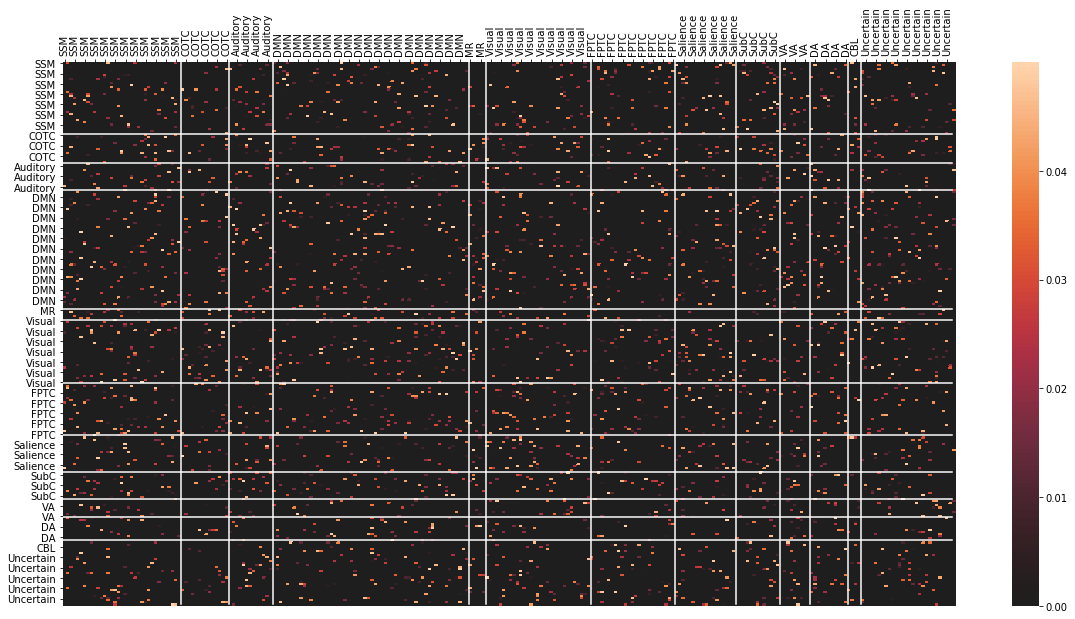

In [5]:
Names=pd.read_excel('names.xlsx')
df=pd.read_csv('/Volumes/Pegasus_wangyun/ADHD/ITA/MRI/ADHD_MatchT1T2/Clinical_change.csv')
df['Medication']=df['Medication'].astype('category')
df['Medication_code']=df['Medication'].cat.codes
df=df.drop('Unnamed: 0',axis=1)
Label=df.iloc[:,-1].values
mask=Label==1

V_C1_C2=stats.ttest_rel(C1[:,:,mask].reshape(-1,264*264),C2[:,:,mask].reshape(-1,264*264))
T=np.array(V_C1_C2)[1,:].reshape(264,-1)
print(T.shape)
#T[T>0.001]=0

mask1=Label==0
P_C1_C2=stats.ttest_rel(C1[:,:,mask1].reshape(-1,264*264),C2[:,:,mask1].reshape(-1,264*264))
T1=np.array(P_C1_C2)[1,:].reshape(264,-1)
print(T.shape)
T[T>0.05]=0
T[T1<0.05]=0

#T=T[0:236,0:236]
#H=pd.DataFrame(C1[0:236,0:236,1],columns=Names['Network Abbrev'][0:236])
H=pd.DataFrame(T,columns=Names['Network Abbrev'])

for i,j in enumerate(Names['Network Abbrev']):
    #print({i:j})
    H.rename({i:j},inplace=True)
plt.figure(figsize=(20,10))
ax=sns.heatmap(H,center=0)
ax.xaxis.set_label_position('top') 

ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.xlabel('')
# plt(np.arange(0,264,1),np.arange(0,264,-1),color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*35,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*49,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*62,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*120,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*125,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*156,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*181,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*199,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*212,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*221,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*232,color='white')
plt.plot(np.ones(264)*236,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*35,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*49,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*62,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*120,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*125,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*156,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*181,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*199,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*212,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*221,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*232,np.arange(0,264,1),color='white')
#plt.plot(np.ones(264)*236,np.arange(0,264,1),color='white')

# T[T>0.001]=0
# sns.heatmap(T)

In [6]:
T.shape

(264, 264)

#Read Clinical Variable 

In [7]:
df=pd.read_csv('/Volumes/Pegasus_wangyun/ADHD/ITA/MRI/ADHD_MatchT1T2/Clinical_change.csv')
df['Medication']=df['Medication'].astype('category')
df['Medication_code']=df['Medication'].cat.codes
df=df.drop('Unnamed: 0',axis=1)
Clinical_change=df.iloc[:,8:-1].values
Label=df.iloc[:,-1].values
mask=Label==1
Clinical_change_vyvanse=Clinical_change[mask]
C_change_vyvanse=C_change[:,:,mask].reshape(Clinical_change_vyvanse.shape[0],-1)
C_change_vyvanse=np.nan_to_num(C_change_vyvanse)
print(C_change_vyvanse.shape)

(27, 69696)


In [8]:
# HC=[19,19,23,15,10,23,25,22,21,18,20,18,19,19,20,19,24,22,19,23,20,11,20,20,10,17,18,18,22,19,18,19,7,11,8,12,8,12]
# plt.hist(df['Age'],bins=1 0)
# plt.hist(HC,bins=10,facecolor='orange', alpha=0.5)



In [9]:
#sns.heatmap(C_change,center=0)

# plt.figure()
# sns.heatmap(C2[:,:,2],center=0)

# using Pycca 
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5118469/

In [10]:
# import rcca
# cca = rcca.CCA(reg=0.1, numCC=5)
# cca = rcca.CCACrossValidate(regs=[1e-3,1e-2, 1e-1],  numCCs=[2, 3, 4])

(69696, 1)


/Users/posnerlab/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


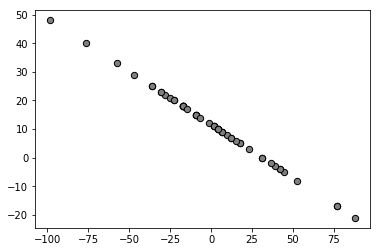

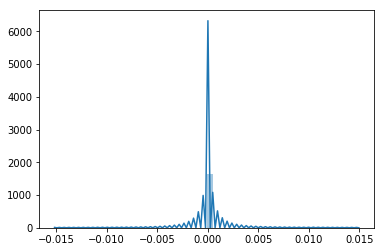

<Figure size 1440x720 with 0 Axes>

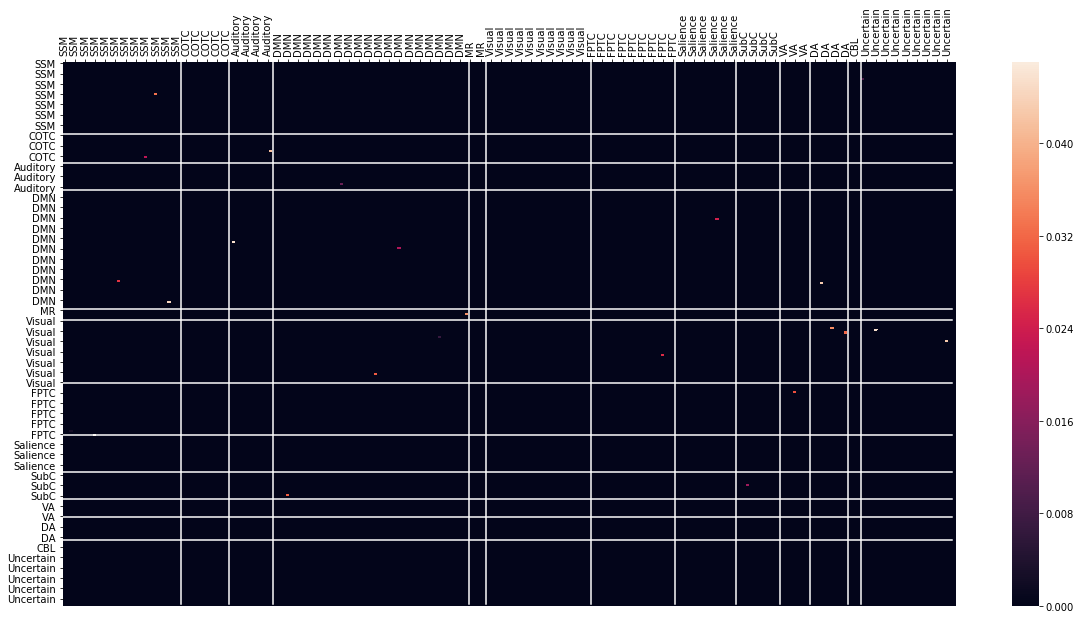

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.cross_decomposition import CCA
C_change_reshape=np.nan_to_num(C_change_reshape)
X=C_change_reshape
y=Clinical_change[:,1]
cca = CCA(n_components=1)
cca.fit(X,y)
#print(cca.score(X,y))
z1=cca.x_loadings_
#cca.x_loadings_.reshape(264,264)
#sns.heatmap(stats.zscore(cca.x_loadings_.reshape(264,264)),center=0)
#X1= cca.transform(X)
plt.scatter(cca.x_scores_, y, s=40, c='gray', edgecolors=(0, 0, 0))
# print(np.corrcoef(cca.x_scores_.flatten(), cca.y_scores_.flatten()))
# print(cca.y_loadings_)
plt.figure()
#sns.heatmap(stats.zscore(cca.x_loadings_.reshape(264,264)),center=0)
z1[np.absolute(z1)<0.01]=0
print(z1.shape)
sns.distplot(z1)
plt.figure(figsize=(20,10))
#sns.heatmap(z1.reshape(264,-1),center=0)
T[np.absolute(z1.reshape(264,264))<0.01]=0
H=pd.DataFrame(T,columns=Names['Network Abbrev'])

for i,j in enumerate(Names['Network Abbrev']):
    #print({i:j})
    H.rename({i:j},inplace=True)
plt.figure(figsize=(20,10))
ax=sns.heatmap(H)
ax.xaxis.set_label_position('top') 

ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.xlabel('')
# plt(np.arange(0,264,1),np.arange(0,264,-1),color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*35,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*49,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*62,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*120,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*125,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*156,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*181,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*199,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*212,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*221,color='white')
plt.plot(np.arange(0,264,1),np.ones(264)*232,color='white')
plt.plot(np.ones(264)*236,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*35,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*49,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*62,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*120,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*125,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*156,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*181,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*199,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*212,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*221,np.arange(0,264,1),color='white')
plt.plot(np.ones(264)*232,np.arange(0,264,1),color='white')
plt.savefig('heatmap.pdf')

# y=Clinical_change[:,1]
# cca = CCA(n_components=1)
# cca.fit(X,y)
# #print(cca.score(X,y))
# z2=cca.x_scores_

# X2= cca.transform(X)
# #plt.scatter(cca.x_scores_, cca.y_scores_, s=40, c='red', edgecolors=(0, 0, 0))
# print(np.corrcoef(cca.x_scores_.flatten(), cca.y_scores_.flatten()))
# plt.figure()
# plt.scatter(z1.flatten(),z2.flatten(),s=40)
# cca.x_loadings_.reshape(264,264)
#sns.heatmap(stats.zscore(cca.x_loadings_.reshape(264,264)),center=0)


In [ ]:
Z=np.where(T)
Z=np.array(Z).T
N=pd.DataFrame()
import sys
sys.stdout=open("test.txt","w")
for i,j in enumerate(Z):

     print(Names['Network Abbrev \n'][j].T)
     print(Names['ROI'][j].T)

sys.stdout.close()


In [ ]:
X=C_change_reshape
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_


In [ ]:
print(np.corrcoef(cca.x_scores_.flatten(), cca.y_scores_.flatten()))


In [ ]:
df=pd.read_csv('/Volumes/Pegasus_wangyun/ADHD/ITA/MRI/ADHD_MatchT1T2/Clinical_change.csv')
df['Medication']=df['Medication'].astype('category')
df['Medication_code']=df['Medication'].cat.codes
#df=df.drop('src_subject_id',axis=1)

In [ ]:
df=pd.read_csv('/Volumes/Pegasus_wangyun/ADHD/ITA/MRI/ADHD_MatchT1T2/Clinical_change.csv')
df['Medication']=df['Medication'].astype('category')
df['Medication_code']=df['Medication'].cat.codes
df=df.drop('src_subject_id',axis=1)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

classif = OneVsRestClassifier(SVC(kernel='linear'))
classif.fit(X,y)

In [ ]:
# zero_class = np.where(y==0)

# one_class = np.where(y==1)

In [ ]:
plt.scatter(y[:,2], X, s=40, c='gray', edgecolors=(0, 0, 0))
# plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
#              facecolors='none', linewidths=2, label='Class 1')
# plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
#              facecolors='none', linewidths=2, label='Class 2')
